In [1]:
# Importações
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import wordcloud as WD
from collections import Counter
import re
import seaborn as sns
import ast

In [2]:
# Definição de funções necessárias
def plot_top_barlplot(word_list, escopo, number=20):
    # Contar a frequência de cada palavra
    word_count = Counter(word_list)

    # Selecionar as 10 palavras mais comuns
    common_words = word_count.most_common(number)

    # Separar as palavras e suas frequências
    labels, values = zip(*common_words)

    # Configurar o estilo do gráfico
    sns.set_theme(style="whitegrid")

    # Criar o gráfico de barras
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(values), y=list(labels), palette="viridis")

    # Configurar título e labels
    plt.title(f'Top {number} Palavras Mais Usadas {escopo}')
    plt.xlabel('Frequência')
    plt.ylabel('Palavras')

    # Exibir o gráfico
    plt.show()

def plot_wordcloud(word_list):
    # Gerar a nuvem de palavras
    wordcloud = WD.WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list))

    # Exibir a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [3]:
# Importa dados
df_final = pd.read_csv('dados/df_final.zip')

# Re-transforma as listas em listas
df_final['title'] = df_final['title'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_final['corpo_texto'] = df_final['corpo_texto'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


display(df_final)

,title,link,date,corpo_texto,classe
0,"[cai, número, casos, graves, coronavírus, frança]",https://noticias.uol.com.br/ultimas-noticias/e...,23/06/2020 03h33,"[parir, jun, efe, frança, anunciar, n, segunda...",1
1,"[aviões, pandemia, pátio, aeroporto, vira, gra...",https://economia.uol.com.br/todos-a-bordo/2020...,08/05/2020 04h00,"[cancelamento, voo, causar, pandemia, covid19,...",1
2,"[ladrão, roubou, 98, doses, coronavac, sp, pla...",https://noticias.uol.com.br/saude/ultimas-noti...,25/03/2021 13h11,"[homem, roubar, dose, vacinar, coronavac, covi...",1
3,"[sinovac, pagou, propina, doria, trazer, vacin...",https://www.boatos.org/saude/sinovac-pagou-pro...,09/12/2020,"[ih, enzuh, trazer, novidade, mídia, hehe, dit...",0
4,"[ofíciosacesse, ofícios, eventos, adversos, pó...",https://www.gov.br/saude/pt-br/vacinacao/esavi...,Data não disponível,"[ofícios, ministério, saúde, ir, conteúdo, 1, ...",1
...,...,...,...,...,...
3320,"[rio, janeiro, recebeu, imunizantes, contra, c...",https://www.gov.br/saude/pt-br/assuntos/notici...,Data não disponível,"[rio, janeiro, recebeu, imunizantes, contra, c...",1
3321,"[estratégia, vacinação, contra, covid19]",https://www.gov.br/saude/pt-br/vacinacao/publi...,Data não disponível,"[estratégia, vacinação, contra, covid19, minis...",1
3322,"[indonésia, inicia, vacinação, contra, covid19...",https://extra.globo.com/noticias/coronavirus/i...,Publicado em 13/01/21 11:12,"[indonésio, campanha, vacinação, covid19, n, q...",1
3323,"[fake, foto, mostre, corpos, idosos, covid19, ...",https://g1.globo.com/fato-ou-fake/coronavirus/...,25/04/2020,"[circular, rede, social, foto, homem, corpo, j...",0


In [4]:
# Palavras-chave
keywords = ["vacina", "vacinação", "vacinacao", "covid", "pandemia", "corona", "coronavírus", "coronavirus", "quarentena", "sars-cov-2"]
keywords_regex = r"\b(vacina(r|s|ção)?|covid(19)?|pandemia|corona(v[íi]rus)?|quarentena|boato(s)?|fake|n|d|p[áa]gina(s)?|ediç([ãa]o|[õo]es)|sars-cov-2)\b"

## Títulos

/tmp/ipykernel_831808/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


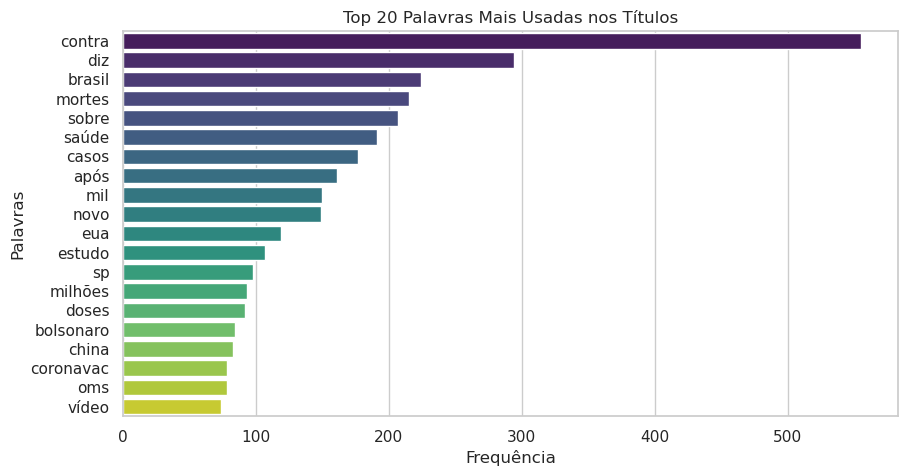

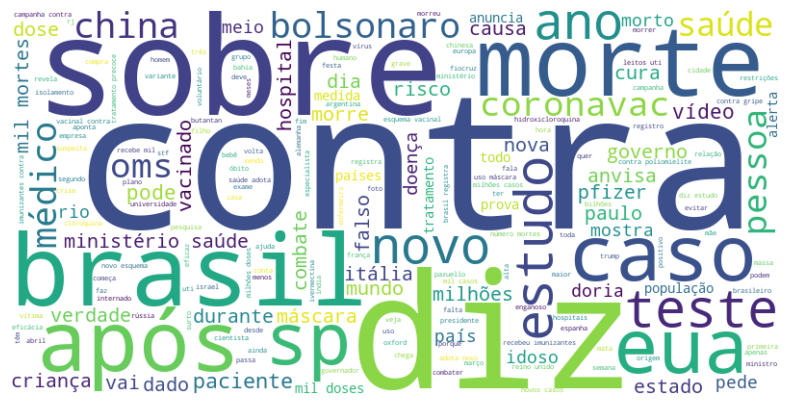

In [5]:
# --------------------------- Palavras mais usadas --------------------------- #
# Reunir todas as palavras de todos os títulos
title_words = [word for title in df_final['title'] for word in title]

# Filtrar as palavras-chave utilizadas na busca (com regex)
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, "nos Títulos")
plot_wordcloud(title_words)

/tmp/ipykernel_831808/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


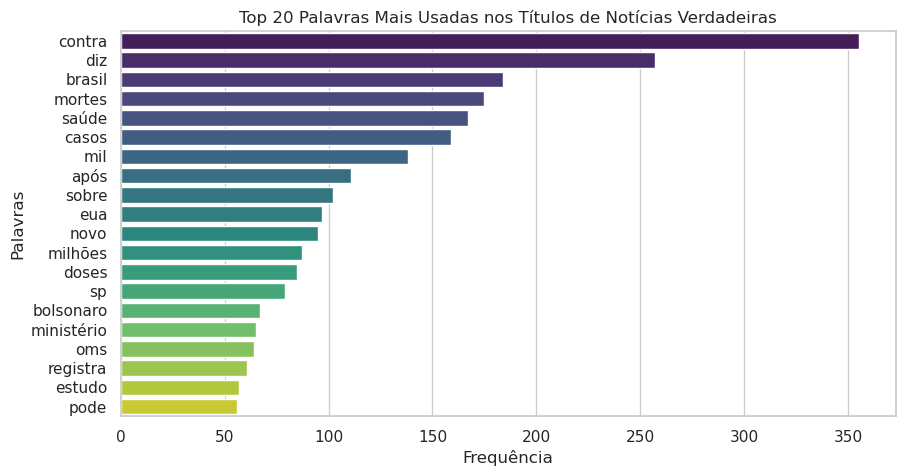

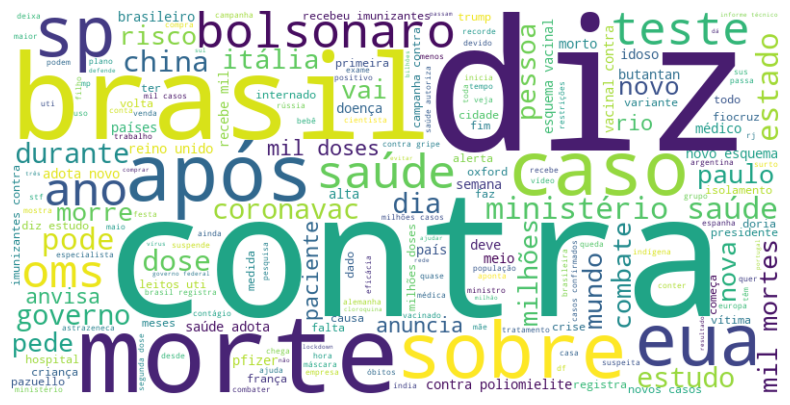

In [6]:
# --------------- Palavras mais usadas nas notícias verdadeiras -------------- #
# Separar notícias verdadeiras
df_true = df_final.loc[df_final['classe']==1]

title_words = [word for title in df_true['title'] for word in title]
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, "nos Títulos de Notícias Verdadeiras")
plot_wordcloud(title_words)

/tmp/ipykernel_831808/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


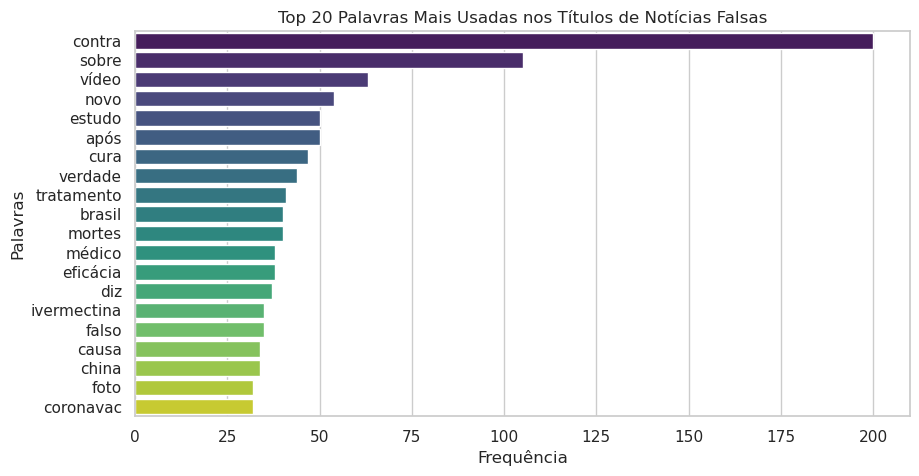

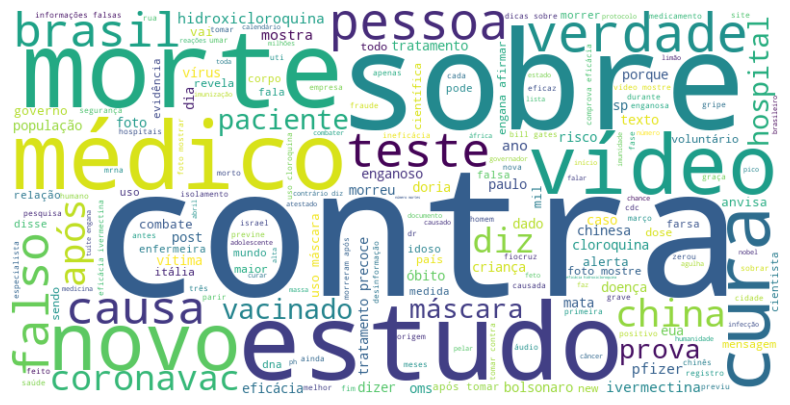

In [7]:
# ----------------- Palavras mais usadas nas notícias falsas ----------------- #
# Separar notícias falsas
df_false = df_final.loc[df_final['classe']==0]

title_words = [word for title in df_false['title'] for word in title]
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, 'nos Títulos de Notícias Falsas')
plot_wordcloud(title_words)

## Corpo do Texto

/tmp/ipykernel_831808/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


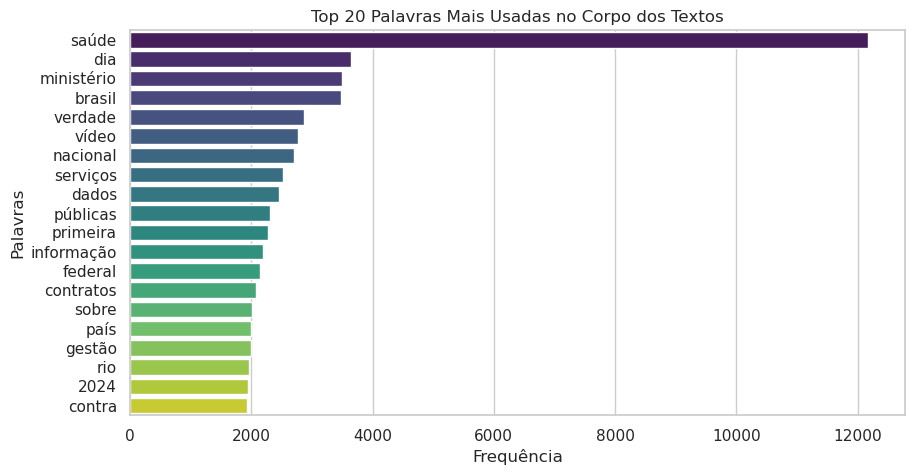

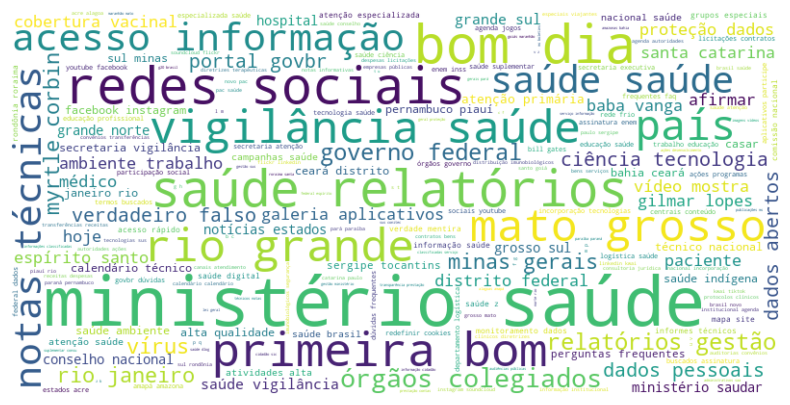

In [8]:
# --------------------------- Palavras mais usadas --------------------------- #
# Reunir todas as palavras do corpo de todos os textos
title_words = [word for title in df_final['corpo_texto'] for word in title]

# Filtrar as palavras-chave utilizadas na busca (com regex)
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, "no Corpo dos Textos")
plot_wordcloud(title_words)

/tmp/ipykernel_831808/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


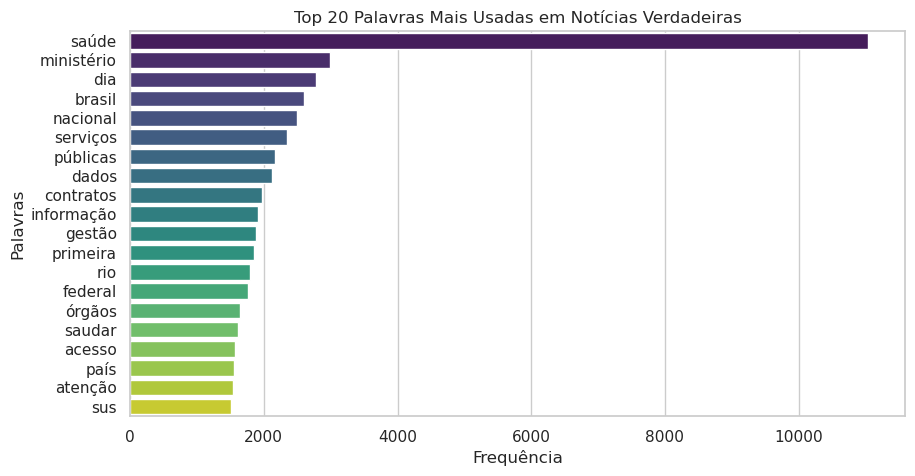

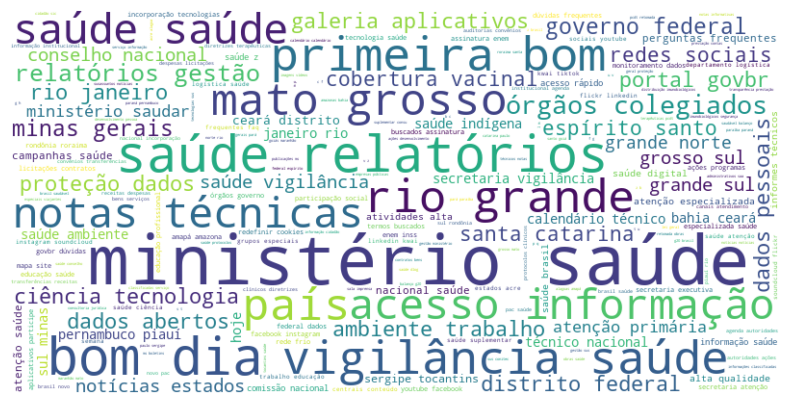

In [9]:
# --------------- Palavras mais usadas nas notícias verdadeiras -------------- #
# Separar notícias verdadeiras
df_true = df_final.loc[df_final['classe']==1]

title_words = [word for title in df_true['corpo_texto'] for word in title]
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, "em Notícias Verdadeiras")
plot_wordcloud(title_words)

/tmp/ipykernel_831808/4182420869.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="viridis")


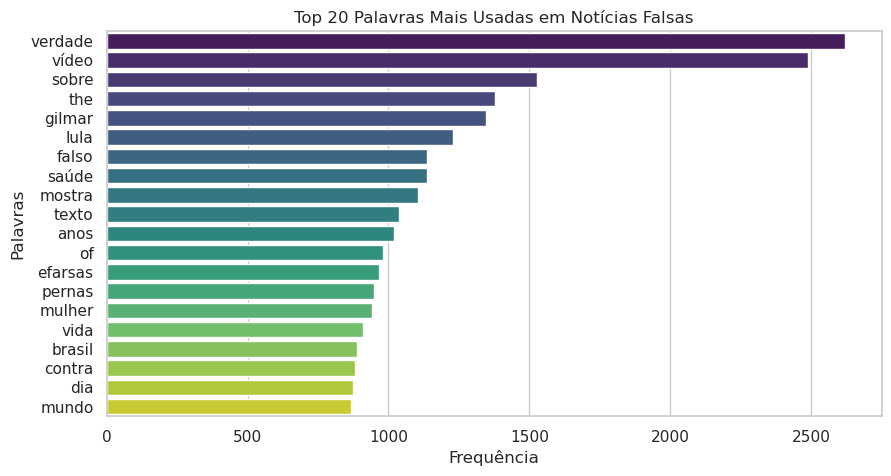

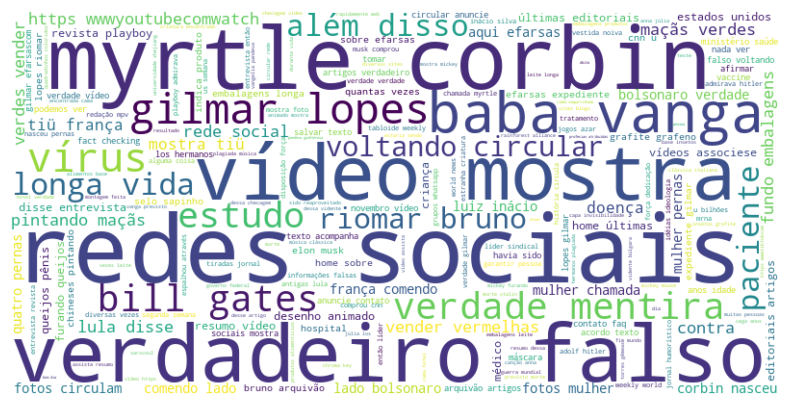

In [10]:
# ----------------- Palavras mais usadas nas notícias falsas ----------------- #
# Separar notícias falsas
df_false = df_final.loc[df_final['classe']==0]

title_words = [word for title in df_false['corpo_texto'] for word in title]
title_words = [word for word in title_words if not re.search(keywords_regex, word, re.IGNORECASE)]

# Plots
plot_top_barlplot(title_words, 'em Notícias Falsas')
plot_wordcloud(title_words)